<a href="https://colab.research.google.com/github/innovatorved/start-with-opencv/blob/master/open_cv2_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%shell
git clone https://github.com/misbah4064/opencvTutorial.git

Cloning into 'opencvTutorial'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 28 (delta 3), reused 12 (delta 1), pack-reused 0
Unpacking objects: 100% (28/28), done.


In [ ]:
%cd drive/MyDrive

/content/drive/MyDrive


##**Start**

In [ ]:
import cv2
# import numpy as np
from google.colab.patches import cv2_imshow

# read img : cv2.imread(__img-path-name__)
img = cv2.imread("image/color.jpg")

# show image : cv2_imshow(__name of read image__)
cv2_imshow(img)

In [ ]:
# check the Dimensions of image
img.shape

(476, 640, 3)

##Changing Colour Profiles


In [ ]:
# changing Gray Scale
img2 = cv2.imread("image/img1.jpg")
ch_gray = cv2.cvtColor(img2 , cv2.COLOR_BGR2GRAY)
cv2_imshow(ch_gray)

# if we change image BGR 2 Gray we compress 3 channel into single channel
# these channels contain information of Red , Blue and Green color info of image
# we have reduce no.  of channelss also information and pixels

print(f"Shape of RGB {(img2.shape)} and Shape of Grey {ch_gray.shape}")

In [ ]:
IMG3 = cv2.cvtColor(img2 , cv2.COLOR_BGR2RGBA)
print(IMG3.shape)
cv2_imshow(IMG3)

In [ ]:
# HSL image
# also 3 channels but color info is define on single bit
# convert ch_gray into hsv image
# HSV stands for: HUE SATURATION VARIANCE
hsv = cv2.cvtColor(img2 , cv2.COLOR_BGR2HSV)
print(hsv.shape)
cv2_imshow(hsv)

##Edge Detection


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

img4 = cv2.imread("image/light.jpg")
print(img4.shape)
# cv2_imshow(img4)

#Canny_Edge_detection on image
#Cannyimage does not display we want to convert in any format like grey scale
#it only works on grey scale image
# it supoose image is grey scale
grey_img4 = cv2.cvtColor(img4 , cv2.COLOR_BGR2GRAY)
canny_image = cv2.Canny(grey_img4 ,150,200)
# print(canny_image.shape)
# cv2_imshow(canny_image)
# matrix manipulation bby opencv
# Erosion and Dilation
# genrate wwindow size for erosion

(4624, 3468, 3)


In [ ]:
# Erosion
# Remove Pixels from Boundaries
# ersosion genrally use to remove noise better with dilation
kernel = np.ones((1,1),np.uint8)
erode_image = cv2.erode(canny_image ,kernel , iterations = 1 )
# cv2_imshow(erode_image)

In [ ]:
# Dialtion 
# Add pixels in Boundaries
kernel2 = np.ones((5,5),np.uint8)
dilate_image = cv2.dilate(canny_image , kernel2 , iterations = 1)
# cv2_imshow(dilate_image)

###perform Erosion and Dilation on Image


(476, 640, 3)


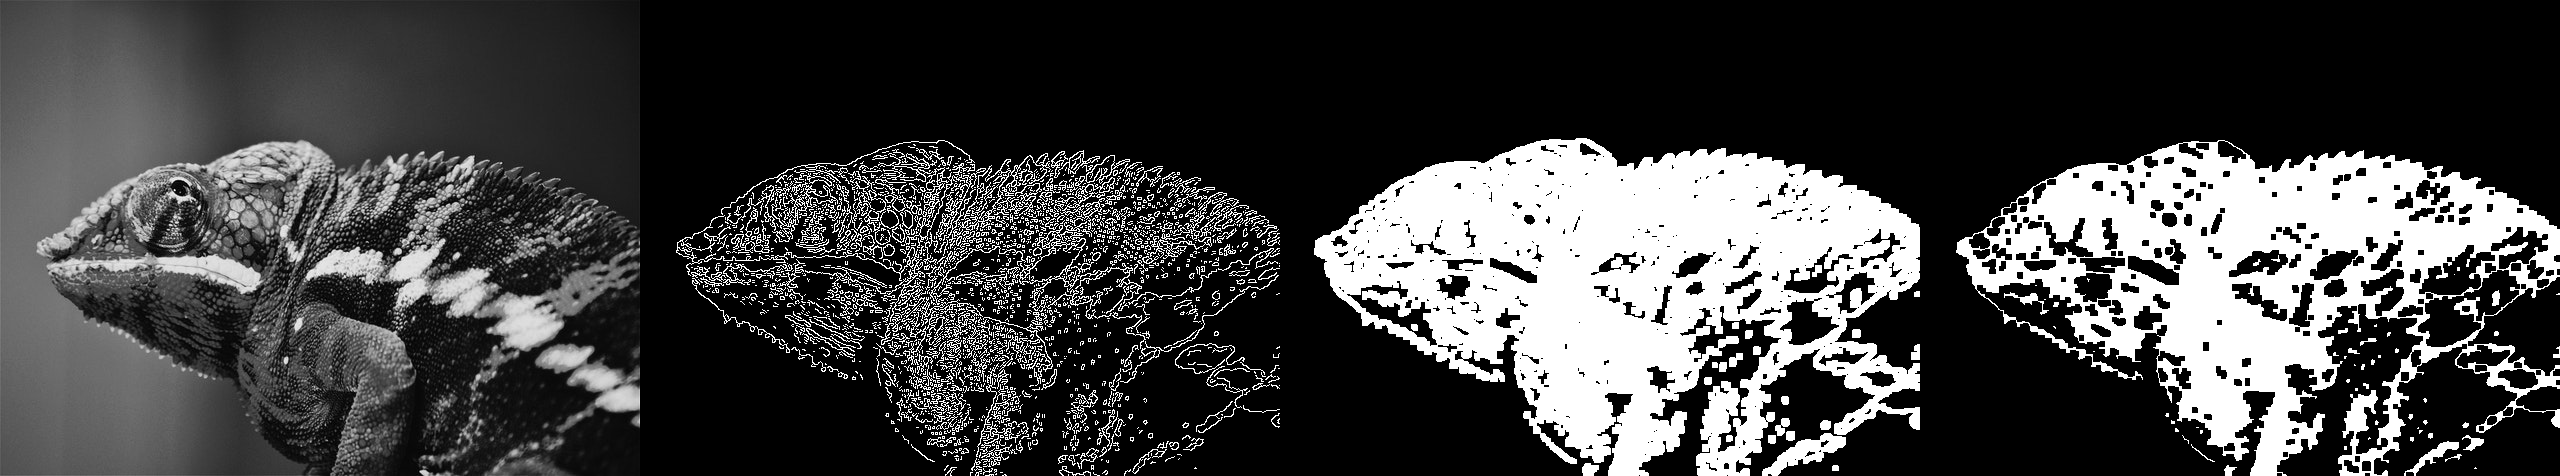

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
# Always erosio after Dilated image
# first add pixels in boundaries by Dialation then remove pixels from boundaries by erosion
# select img light2.jpg

# firsdt read the image
# image/light.jpg
my_img = cv2.imread("image/color.jpg")
print(my_img.shape)  # shape of image

# change image in to grey scale for performing Canny
grey_my_img = cv2.cvtColor(my_img , cv2.COLOR_BGR2GRAY)

# Change Grey Scale image into Canny Image
canny_my_img = cv2.Canny(grey_my_img , 150 , 200)
# cv2_imshow(canny_my_img)

# perform Dilation first 
# make window or kernel
kernel = np.ones((5,5) ,np.uint8 )
dilate_my_img = cv2.dilate(canny_my_img , kernel , iterations = 1)
# cv2_imshow(dilate_my_img)

# then perform Erosion
erosion_my_img = cv2.erode(dilate_my_img , kernel , iterations = 1)
# cv2_imshow(erosion_my_img)

# show these all image horizentaly by np.hstach fun
# cv2_imshow(my_img)
display = np.hstack((grey_my_img ,canny_my_img , dilate_my_img , erosion_my_img))
cv2_imshow(display)


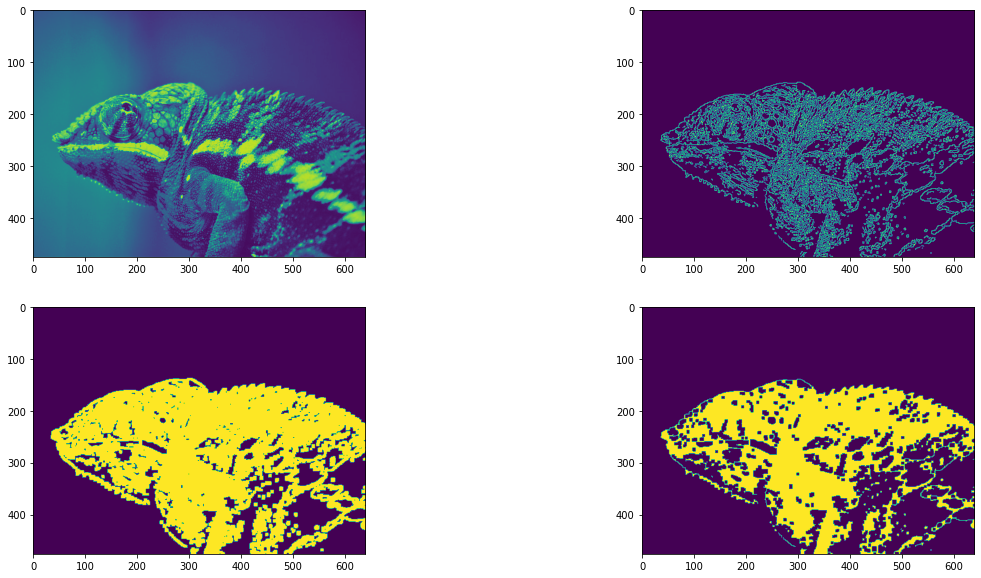

In [ ]:
%matplotlib inline
# create figure
fig = plt.figure(figsize=(20,10))
rows = 2
columns = 2

fig.add_subplot(rows, columns, 1)
plt.imshow(grey_my_img)

fig.add_subplot(rows, columns, 2)
plt.imshow(canny_my_img)

fig.add_subplot(rows, columns, 3)
plt.imshow(dilate_my_img)

fig.add_subplot(rows, columns, 4)
plt.imshow(erosion_my_img)

plt.show()

## Image Manipulation Noise Removal

In [ ]:
# we study noise removal one of the branch of Image manipulation
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

lion_img = cv2.imread("image/lion.jpg")
print(lion_img.shape)
# cv2_imshow(lion_img)

# Image Denoising
# it apply noising filter 
# it remove large extent by its averaging pixels by  taking mean of pixel in that area and denoising it
"""
Modification of fastNlMeansDenoising function for colored images.

Parameters
    src	            Input 8-bit 3-channel image.
    dst	            Output image with the same size and type as src .
    h_luminance	    Parameter regulating filter strength. Big h value perfectly removes noise but also removes image details, smaller h value preserves details but also preserves some noise
    photo_render	  float The same as h but for color components. For most images value equals 10 will be enough to remove colored noise and do not distort colors
    search_window	  Size in pixels of the window that is used to compute weighted average for given pixel. Should be odd. Affect performance linearly: greater search_window - greater denoising time. Recommended value 21 pixels
    block_size	    Size in pixels of the template patch that is used to compute weights. Should be odd. Recommended value 7 pixels
    stream	        Stream for the asynchronous invocations.

"""

denoise = cv2.fastNlMeansDenoisingColored(lion_img , None , 19,10 ,21 ,7)
display2 = np.hstack((lion_img , denoise))
cv2_imshow(display2)

##Drawing Shapes and Writing

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

# creating an image using numpy
matrix = np.zeros((512 , 512 ,3) , np.uint8) # black box of 512 * 512 
# mat = cv2.imread("")
# uint8 : 0 to 255
# cv2_imshow(matrix) # black box of 512 * 512 



###Drawing Functions


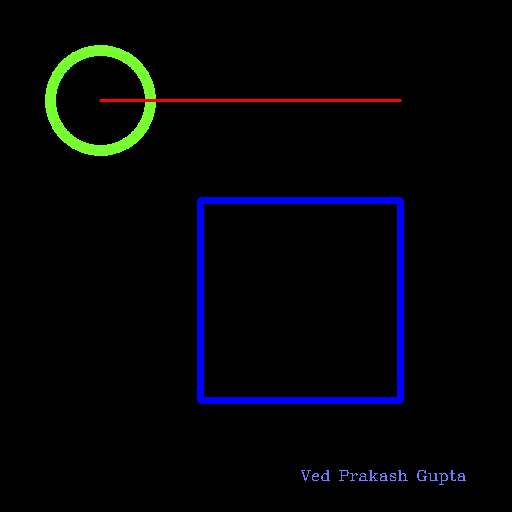

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

# create black image
image_black = np.zeros((512 , 512 ,3) , np.uint8) # black box of 512 * 512 
# Draw a Circle
# cv2.circle(__img-source__ , __circle-center-by-x-y__ ,__radius__ , __colour__(blue , green , red),thickness)
cv2.circle(image_black , (100,100) ,50 , (50 , 255 , 120) , 10)
# cv2_imshow(image_black)
# Draw a rectangle
"""
rectangle(img, pt1, pt2, color[, thickness[, lineType[, shift]]]) -> img
.   @brief Draws a simple, thick, or filled up-right rectangle.
.   
.   The function cv::rectangle draws a rectangle outline or a filled rectangle whose two opposite corners
.   are pt1 and pt2.
.   
.   @param img Image.
.   @param pt1 Vertex of the rectangle. is the up-left coordinates of an rectangle
.   @param pt2 Vertex of the rectangle opposite to pt1 . is the down-right coordinates of and rectangle
.   @param color Rectangle color or brightness (grayscale image).
.   @param thickness Thickness of lines that make up the rectangle
"""
cv2.rectangle(image_black ,(200 ,200) ,(400,400) ,(255,0,0) , 5)
# cv2_imshow(image_black)

# Draw a line
"""
line(img, pt1, pt2, color[, thickness[, lineType[, shift]]]) -> img
.   @brief Draws a line segment connecting two points.
.   
.   The function line draws the line segment between pt1 and pt2 points in the image. The line is
.   clipped by the image boundaries. For non-antialiased lines with integer coordinates, the 8-connected
.   or 4-connected Bresenham algorithm is used. Thick lines are drawn with rounding endings. Antialiased
.   lines are drawn using Gaussian filtering.
.   
.   @param img Image.
.   @param pt1 First point of the line segment.
"""
cv2.line(image_black , (100,100) ,(400 , 100) , (0,0,255) , 2)
# cv2_imshow(image_black)

# Write text on an Image
"""
putText(img, text, org, fontFace, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]]) -> img
.   @brief Draws a text string.
.   
.   The function cv::putText renders the specified text string in the image. Symbols that cannot be rendered
.   using the specified font are replaced by question marks. See #getTextSize for a text rendering code
.   example.
.   
.   @param img Image.
.   @param text Text string to be drawn.
.   @param org Bottom-left corner of the text string in the image.
.   @param fontFace Font type, see #HersheyFonts.
.   @param Scale fontsize
.   @param Colour (B,G,R) value
.   @param Thickness of font
"""
cv2.putText(image_black , "Ved Prakash Gupta" , (300,480) , cv2.FONT_HERSHEY_COMPLEX , 0.5 ,(255,120,115) , 1)
cv2_imshow(image_black)

#**Bash**


In [ ]:
#@title with colab Bash
from IPython.display import JSON
from google.colab import output
from subprocess import getoutput
import os

def shell(command):
  if command.startswith('cd'):
    path = command.strip().split(maxsplit=1)[1]
    os.chdir(path)
    return JSON([''])
  return JSON([getoutput(command)])
output.register_callback('shell', shell)

In [ ]:
%pwd

In [ ]:
#@title Colab Shell
%%html
<div id=term_demo></div>
<script src="https://code.jquery.com/jquery-latest.js"></script>
<script src="https://cdn.jsdelivr.net/npm/jquery.terminal/js/jquery.terminal.min.js"></script>
<link href="https://cdn.jsdelivr.net/npm/jquery.terminal/css/jquery.terminal.min.css" rel="stylesheet"/>
<script>
  $('#term_demo').terminal(async function(command) {
      if (command !== '') {
          try {
              let res = await google.colab.kernel.invokeFunction('shell', [command])
              let out = res.data['application/json'][0]
              this.echo(new String(out))
          } catch(e) {
              this.error(new String(e));
          }
      } else {
          this.echo('');
      }
  }, {
      greetings: 'Welcome to Goggle Colab Shell',
      name: 'colab_demo',
      height: 300,
      prompt: 'ved@colab $ '
  });